<a href="https://colab.research.google.com/github/JuneWayne/DS2023-Final-Project/blob/main/DS2023_Final_Three_Graphs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Final Three Graphs - ACLR
## Group Members: Ethan, Alieen, Vinith

In [215]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
df = pd.read_csv('aclr_cleaned.csv')
df.drop('Unnamed: 0', axis=1, inplace=True)
df.head()

,record_id,redcap_event_name,sex_dashboard,graft_dashboard2,med_meniscus,lat_meniscus,lat_stab,physis,visit_sex,visit_graft,...,lsi_flex_mvic_60,acl_ext_isok_60,con_ext_isok_60,lsi_ext_isok_60,acl_flex_isok_60,con_flex_isok_60,lsi_flex_isok_60,strength_testing_complete,rts,rts_tss
0,1,baseline_arm_1,Male,Other,1.0,1.0,1.0,0.0,Not Reported,BTB autograft,...,80.21,1.61,2.23,73.80,1.05,1.22,90.00,2.0,3.0,11.0
1,1,visit_1_arm_1,Not Reported,BTB autograft,1.0,1.0,1.0,0.0,Male,Other,...,80.21,2.57,2.92,87.86,1.50,1.45,103.32,2.0,3.0,11.0
2,1,long_term_outcomes_arm_1,Not Reported,BTB autograft,1.0,1.0,1.0,0.0,Not Reported,BTB autograft,...,80.21,1.61,2.23,73.80,1.05,1.22,90.00,2.0,3.0,70.0
3,2,baseline_arm_1,Female,HS autograft,1.0,3.0,1.0,0.0,Not Reported,BTB autograft,...,80.21,1.61,2.23,73.80,1.05,1.22,90.00,2.0,3.0,11.0
4,2,visit_1_arm_1,Not Reported,BTB autograft,1.0,1.0,1.0,0.0,Female,HS autograft,...,80.21,0.97,2.16,45.00,0.88,1.20,72.98,2.0,3.0,11.0


In [3]:
df['tss_dashboard'].value_counts()

,count
tss_dashboard,
5 to 7 months,8212
3 to 4 months,1141
8 to 12 months,1037
Not Reported,464
13 to 24 months,266
Preoperative,30


In [19]:
df[df['record_id']==101].loc[:,'tss_dashboard']

,tss_dashboard
370,5 to 7 months
371,5 to 7 months
372,8 to 12 months
373,8 to 12 months


# Radar Chart Small Multiples

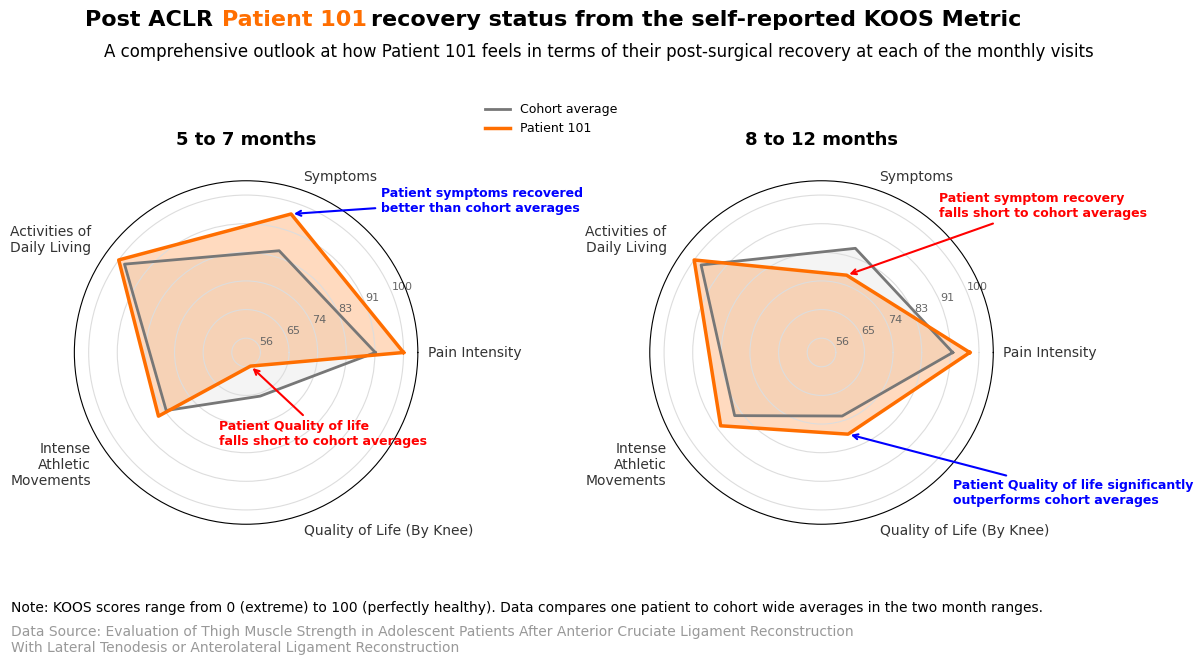

In [212]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# aggregate together the evaluative metrics as well as the visit sessions
koos_metrics = ['koos_pain', 'koos_sx', 'koos_adl', 'koos_sport', 'koos_qol']
visits = ['5 to 7 months', '8 to 12 months']  # only the two ranges we care about

# calculating the visit-wise averages of each metric
koos_avg = df.groupby('tss_dashboard')[koos_metrics].mean().loc[visits]

# pull this one patient and average duplicates
patient_df = (
    df[df['record_id'] == 101]
      .groupby('tss_dashboard')[koos_metrics]
      .mean()
      .reindex(visits)
)

# global min / max so both small-multiple panels share the same scale
min_value = min(koos_avg.min().min(), patient_df.min().min())
max_value = max(koos_avg.max().max(), patient_df.max().max())
margin_value = (max_value - min_value) * 0.1

# angles for the five KOOS spokes
N = len(koos_metrics)
angles = np.linspace(0, 2*np.pi, N, endpoint=False).tolist()
angles += angles[:1]

# set up the side-by-side polar subplots
fig, axes = plt.subplots(nrows=1, ncols=len(visits), subplot_kw=dict(polar=True), figsize=(12, 8))
if len(visits) == 1:
    axes = [axes]

# colors to reuse
avg_colors = ['#777777', '#777777']
patient_colors = ['#FF6E00', '#FF6E00']

# loop through each visit stage and dedicated axis
for idx in range(len(visits)):
    stage = visits[idx]
    ax = axes[idx]
    ax.set_facecolor('white')
    ax.set_ylim([min_value - margin_value, max_value + margin_value])

    avg_vals = koos_avg.loc[stage].tolist()
    avg_vals.append(avg_vals[0])
    ax.plot(angles, avg_vals, label='Cohort average', color=avg_colors[idx], linewidth=2)
    ax.fill(angles, avg_vals, color=avg_colors[idx], alpha=0.08)

    if not patient_df.loc[stage].isna().all():
        pat_vals = patient_df.loc[stage].tolist()
        pat_vals.append(pat_vals[0])
        ax.plot(angles, pat_vals, label='Patient 101', color=patient_colors[idx], linewidth=2.5)
        ax.fill(angles, pat_vals, color=patient_colors[idx], alpha=0.25)

    labels = ['Pain Intensity', 'Symptoms', 'Activities of\nDaily Living', 'Intense\nAthletic\nMovements', 'Quality of Life (By Knee)']
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(['']*N)
    radial_push = [3, 4, 6, 6, 5]
    for ang, txt, extra in zip(angles[:-1], labels, radial_push):
        r = max_value + margin_value + extra
        ha = 'left' if (0 <= ang <= np.pi/2 or 3*np.pi/2 <= ang <= 2*np.pi) else 'right'
        ax.text(ang, r, txt, ha=ha, va='center', fontsize=10, color='#333333')

    ax.tick_params(colors='#666666')
    ax.yaxis.grid(True, color='#DDDDDD', linewidth=0.8)
    ax.xaxis.grid(False)
    ticks = np.linspace(min_value, max_value, 6)
    ax.set_yticks(ticks)
    ax.set_yticklabels([f"{x:.0f}" for x in ticks], fontsize=8)
    ax.set_title(stage, y=1.08, fontweight='bold', fontsize=13)

# drawing the arrows
metric_name = 'koos_qol'
metric_idx = koos_metrics.index(metric_name)
metric_ang = angles[metric_idx]

symptoms_name = 'koos_sx'
symptoms_idx = koos_metrics.index(symptoms_name)
symptoms_ang = angles[symptoms_idx]

if not patient_df.loc['5 to 7 months'].isna().all():
    val_57 = patient_df.loc['5 to 7 months', metric_name]
    axes[0].annotate("Patient Quality of life\nfalls short to cohort averages", xy=(metric_ang, val_57), xytext=(metric_ang - 0.6, val_57 + 25), arrowprops=dict(arrowstyle='->', color='red', lw=1.5), fontsize=9, color='red', fontweight='bold')

if not patient_df.loc['8 to 12 months'].isna().all():
    val_812 = patient_df.loc['8 to 12 months', metric_name]
    axes[1].annotate("Patient Quality of life significantly\noutperforms cohort averages", xy=(metric_ang, val_812), xytext=(metric_ang + 0.4, val_812 + 35), arrowprops=dict(arrowstyle='->', color='blue', lw=1.5), fontsize=9, color='blue', fontweight='bold')


if not patient_df.loc['5 to 7 months'].isna().all():
    val_812 = patient_df.loc['5 to 7 months', symptoms_name]
    axes[0].annotate("Patient symptoms recovered\nbetter than cohort averages", xy=(symptoms_ang, val_812), xytext=(symptoms_ang -0.45, val_812 + 15), arrowprops=dict(arrowstyle='->', color='blue', lw=1.5), fontsize=9, color='blue', fontweight='bold')

if not patient_df.loc['8 to 12 months'].isna().all():
    val_812 = patient_df.loc['8 to 12 months', symptoms_name]
    axes[1].annotate("Patient symptom recovery\nfalls short to cohort averages", xy=(symptoms_ang, val_812), xytext=(symptoms_ang - 0.4, val_812 + 30), arrowprops=dict(arrowstyle='->', color='red', lw=1.5), fontsize=9, color='red', fontweight='bold')

# legend customization
handles, labels = axes[-1].get_legend_handles_labels()
fig.legend(handles, labels, loc='upper center', bbox_to_anchor=(0.46, 0.75), ncol=1, frameon=False, fontsize=9)

plt.figtext(0.01, 0.1, 'Note: KOOS scores range from 0 (extreme) to 100 (perfectly healthy). Data compares one patient to cohort wide averages in the two month ranges.', fontsize=10, ha='left')
plt.figtext(0.01, 0.05,"Data Source: Evaluation of Thigh Muscle Strength in Adolescent Patients After Anterior Cruciate Ligament Reconstruction\nWith Lateral Tenodesis or Anterolateral Ligament Reconstruction ",fontsize=10, ha='left', color='#999999')


plt.tight_layout()
plt.subplots_adjust(top=0.83)


fig.text(0.185, 0.84, 'Post ACLR ', ha='right', va='center', fontsize=16, fontweight='bold')
fig.text(0.186, 0.84, 'Patient 101',  ha='left', va='center', fontsize=16, fontweight='bold', color='#FF6E00')
fig.text(0.31, 0.84, 'recovery status from the self-reported KOOS Metric', ha='left', va='center', fontsize=16, fontweight='bold')
fig.text(0.5, 0.8, 'A comprehensive outlook at how Patient 101 feels in terms of their post-surgical recovery at each of the monthly visits', ha='center', va='center', fontsize=12)


plt.savefig('Radar_small_multiples.png', dpi=300, bbox_inches='tight', facecolor='white')
plt.show()


# Stacked boxplots with time since surgery as a variable

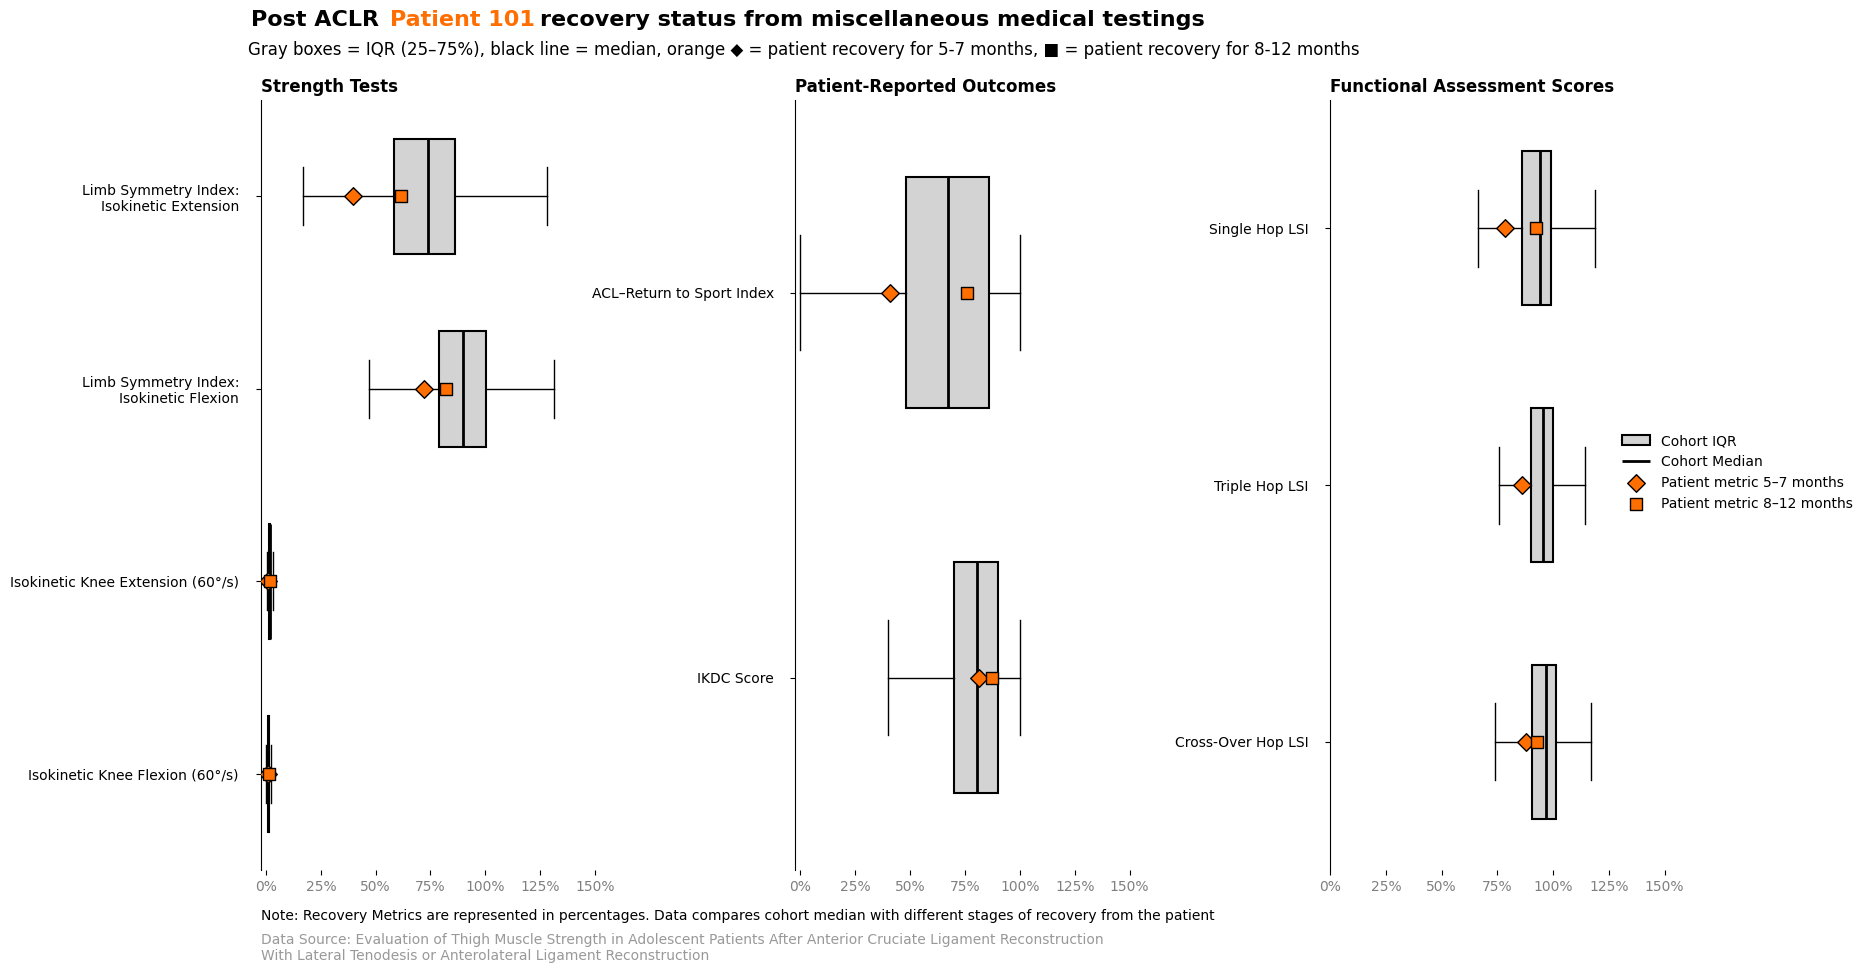

In [211]:
# using the raw dataset rather than the cleaned imputed dataset as the imputed dataset destroys the inter-quartile range
df = pd.read_csv('aclr data(in).csv')

# splitting the data set into patient and cohort for comparison
patient_id = 101
df_patient = df[df['record_id'] == patient_id]
df_cohort  = df[df['record_id'] != patient_id]

# calculating patient records by time since surgery
df_patient_5_7  = df_patient[df_patient['tss_dashboard'] == '5 to 7 months']
df_patient_8_12 = df_patient[df_patient['tss_dashboard'] == '8 to 12 months']

strength_tests    = [
    'acl_flex_isok_60', 'acl_ext_isok_60',
    'lsi_flex_isok_60', 'lsi_ext_isok_60'
]
pr_outcomes       = ['ikdc', 'acl_rsi']
functional_scores = ['ch_lsi', 'th_lsi', 'sh_lsi']

labels = {
    'acl_flex_isok_60': 'Isokinetic Knee Flexion (60°/s)',
    'acl_ext_isok_60': 'Isokinetic Knee Extension (60°/s)',
    'lsi_flex_isok_60':'Limb Symmetry Index:\nIsokinetic Flexion',
    'lsi_ext_isok_60': 'Limb Symmetry Index:\nIsokinetic Extension',
    'ikdc': 'IKDC Score',
    'acl_rsi': 'ACL–Return to Sport Index',
    'ch_lsi': 'Cross-Over Hop LSI',
    'th_lsi': 'Triple Hop LSI',
    'sh_lsi': 'Single Hop LSI'
}

box_color = 'lightgrey'
patient_color = '#FF6E00'

plt.figure(figsize=(18, 10))
plt.subplots_adjust(top=0.85, left=0, right=0.78, bottom=0.08, wspace=0.6)


axes = [plt.subplot(1, 3, i) for i in range(1, 4)]
groups = [strength_tests, pr_outcomes, functional_scores]
titles = ["Strength Tests", "Patient-Reported Outcomes", "Functional Assessment Scores"]

for ax, metrics, title in zip(axes, groups, titles):
    cohort_data   = []
    valid_metrics = []

    # calculating cohort values
    for m in metrics:
        vals = df_cohort[m].dropna().values
        if len(vals) >= 2:
            cohort_data.append(vals)
            valid_metrics.append(m)
    bp = ax.boxplot(
        cohort_data,
        positions = np.arange(len(valid_metrics)),
        vert = False,
        widths = 0.6,
        patch_artist = True,
        showfliers = False,
        showmeans = False,
        boxprops = dict(facecolor=box_color, edgecolor='black', linewidth=1.5),
        whiskerprops = dict(color='black'),
        capprops = dict(color='black'),
        medianprops = dict(color='black', linewidth=2)
    )

    # creating legend labels
    if valid_metrics:
        bp['boxes'][0].set_label('Cohort IQR')
        bp['medians'][0].set_label('Cohort Median')

    # calculating the positioning for the patient's medians for each TSS range
    for i, m in enumerate(valid_metrics):
        pm1 = df_patient_5_7[m].median()
        pm2 = df_patient_8_12[m].median()
        if not np.isnan(pm1):
            sc1 = ax.scatter(pm1, i, marker='D', s=80, facecolor=patient_color, edgecolor='black', zorder=3)
            if i == 0:
                sc1.set_label('Patient metric 5–7 months')
        if not np.isnan(pm2):
            sc2 = ax.scatter(pm2, i, marker='s', s=80, facecolor=patient_color, edgecolor='black', zorder=3)
            if i == 0:
                sc2.set_label('Patient metric 8–12 months')

    # axis styling and autoscaling the x-axis
    ax.set_yticks(np.arange(len(valid_metrics)))
    ax.set_yticklabels([labels[m] for m in valid_metrics], fontsize=10)
    ax.tick_params(axis='y', pad=12)
    ax.set_title(title, fontsize=12, fontweight='bold', loc='left')

    ax.margins(x=0.02)
    ax.set_xlim(left=0)
    ax.autoscale(enable=True, axis='x')

    # labeling out the percentage ticks
    ax.set_xticks([0, 25, 50, 75, 100, 125, 150])
    ax.set_xticklabels(['0%', '25%', '50%', '75%', '100%', '125%', '150%'], alpha=0.5)

    ax.grid(axis='x', linestyle='-', color='white', alpha=1)
    for spine in ['top', 'right', 'bottom']:
        ax.spines[spine].set_visible(False)

axes[-1].legend(loc='lower right', bbox_to_anchor=(1.6, 0.45), frameon=False, fontsize=10)

plt.figtext(0.07, 0.93, 'Post ACLR ', ha='right', va='center', fontsize=16, fontweight='bold')
plt.figtext(0.072, 0.93, 'Patient 101',  ha='left', va='center', fontsize=16, fontweight='bold', color='#FF6E00')
plt.figtext(0.155, 0.93, 'recovery status from miscellaneous medical testings', ha='left', va='center', fontsize=16, fontweight='bold')
plt.figtext(-0.007, 0.9, 'Gray boxes = IQR (25–75%), black line = median, orange ◆ = patient recovery for 5-7 months, ■ = patient recovery for 8-12 months', ha='left', va='center',fontsize=12)

plt.figtext(0, 0.03, 'Note: Recovery Metrics are represented in percentages. Data compares cohort median with different stages of recovery from the patient', fontsize=10, ha='left')
plt.figtext(0, -0.01,"Data Source: Evaluation of Thigh Muscle Strength in Adolescent Patients After Anterior Cruciate Ligament Reconstruction\nWith Lateral Tenodesis or Anterolateral Ligament Reconstruction ",fontsize=10, ha='left', color='#999999')

plt.savefig('stacked_horizontal_boxplots.png', dpi=300, bbox_inches='tight', facecolor='white')
plt.show()


# What does the KOOS self reported Pain Recovery Trajectory look like?

<ipython-input-218-0948d9f5acb1>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['time_ordered'] = df_filtered['tss_dashboard'].map(tss_mapping)


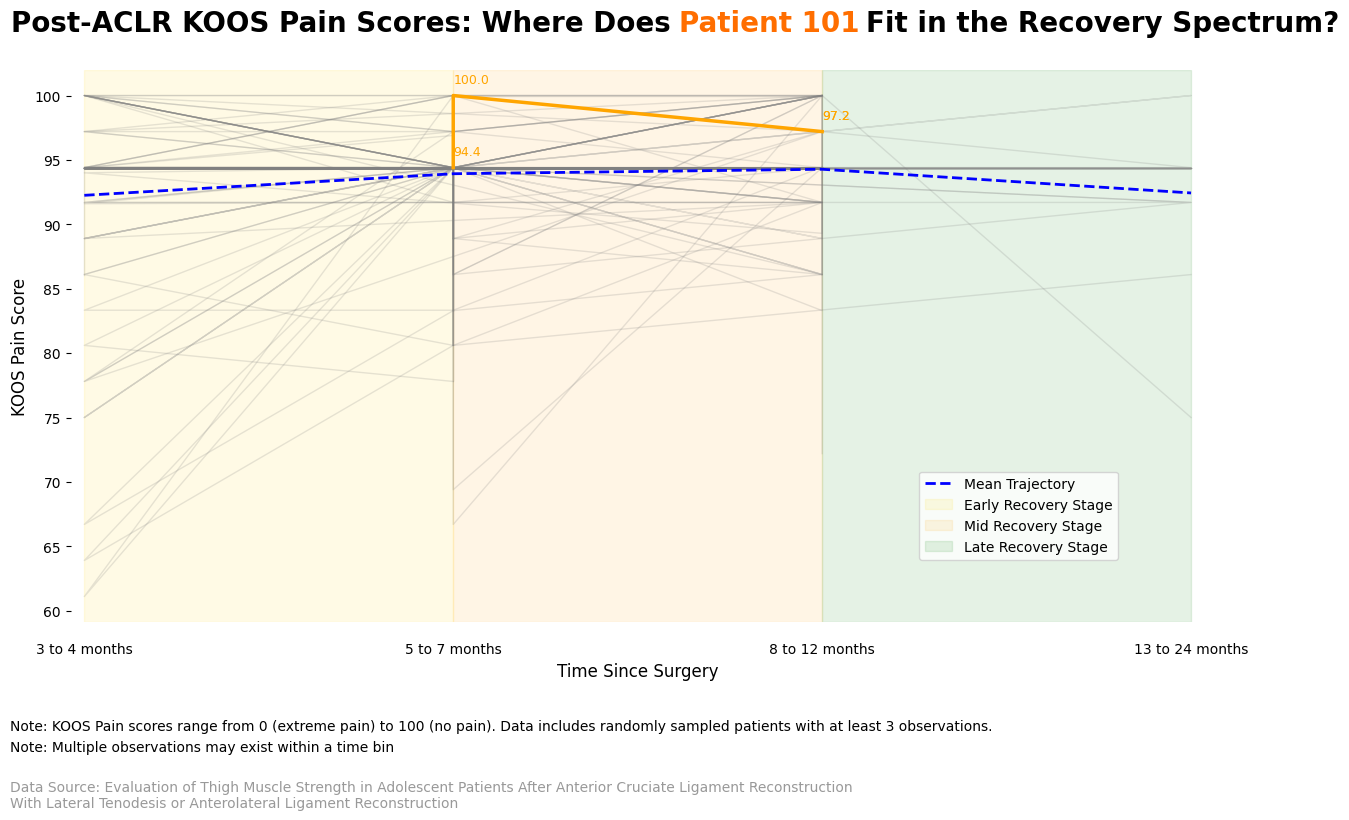

In [218]:
#Importing Necessary Packages
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import random # this is used to select random patients to sample/project on our visualization since we are limiting the number of paitents (lines), being shown on the page.

#SETTING THE SEED- for reproducibility
random.seed(42)

# Let's Remove "Preoperative" stage ( only has a few lines so it's not worth out puting)
df_filtered = df[df['tss_dashboard'] != 'Preoperative']

# Map timepoints (we do this because the default was unordered and didn't have a logical flow)
tss_mapping = {
    "3 to 4 months": 0,
    "5 to 7 months": 1,
    "8 to 12 months": 2,
    "13 to 24 months": 3,
}

df_filtered['time_ordered'] = df_filtered['tss_dashboard'].map(tss_mapping)
# Setting the x-axis labels in correct order
labels = [t for t, a in sorted(tss_mapping.items(), key=lambda x: x[1])]

# Keeping patients with at least 3 timepoints, includeing  patient 101 ( which is our selected patient of focus)
#Consulted with CHATGTP for a little help refining and structreing this part

# What this does is it looks through the record_id and selects the rows that have the same record_id show up atleast 3 times
v = df_filtered['record_id'].value_counts()[lambda x: x >= 3].index
v = v.union([101]) #  Used documentation on how to structure this and use the union function
df_3 = df_filtered[df_filtered['record_id'].isin(v)]

# Let's choose  up to 200 others  patients ( we are doing this so we can compare patient 101 and see relative paths it could take)
other_ids = [i for i in df_3['record_id'].unique() if i != 101] # this filters record_ids ( that show up at 3 different timepoints) excluding patient 101 ( record_id)
sampled_ids = random.sample(other_ids, min(200, len(other_ids))) # this samples 200 random record_ids pateints
sampled_ids.append(101)#(this adds the record_id 101 ( our target pateint))

# this is full dataframe where it includes both the 200 sampled record_ids and our target paitent 101
df_sampled = df_3[df_3['record_id'].isin(sampled_ids)]



# MAKING THE GRAPH (PLOTTING)
plt.figure(figsize=(14, 7))


#Plotting other patient lines (for comparison)- conditional for making all other sample record_ids grey
for p, group in df_sampled.groupby('record_id'):
    if p != 101:
        plt.plot(group['time_ordered'], group['koos_pain'], color='gray', alpha=0.2, linewidth=1)

#Mean trajectory of other patients ( this may be useful to see how our paitent 101 is doing comparing to others ( in that sample))
mean_traj = df_sampled[df_sampled['record_id'] != 101].groupby('time_ordered')['koos_pain'].mean()
plt.plot(mean_traj.index, mean_traj.values, color='blue', linestyle='--', linewidth=2, label='Mean Trajectory') # blue is a good choice

# Recovery phases- for visual aiding
plt.axvspan(0, 1, color='gold', alpha=0.1, label='Early Recovery Stage')
plt.axvspan(1, 2, color='orange', alpha=0.1, label='Mid Recovery Stage')
plt.axvspan(2, 3, color='green', alpha=0.1, label='Late Recovery Stage')

# Let's Highlight Patient 101
ben = df_sampled[df_sampled['record_id'] == 101].sort_values('time_ordered') #this makes a new column that has information on our benchmark patient
plt.plot(ben['time_ordered'], ben['koos_pain'], color='orange', linewidth=2.5) # red to show importance
# Annotate each point on Patient 101's line with the KOOS Pain score value
for x, y in zip(ben['time_ordered'], ben['koos_pain']):
    plt.text(x, y + 1, f'{y:.1f}', color='orange', fontsize=9, ha='left')


# styling
plt.xticks(ticks=range(len(labels)), labels=labels)
plt.xlabel('Time Since Surgery',fontsize=12)
plt.ylabel('KOOS Pain Score', fontsize=12)
plt.text(-0.2, 105, 'Post-ACLR KOOS Pain Scores: Where Does',fontsize=20, fontweight='bold', ha='left')
plt.text(1.613, 105, 'Patient 101', fontsize=20, fontweight='bold', ha='left', color='#FF6E00')
plt.text(2.12, 105, 'Fit in the Recovery Spectrum?', fontsize=20, fontweight='bold', ha='left')
plt.grid(False)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['bottom'].set_visible(False)
plt.gca().spines['left'].set_visible(False)
plt.gca().spines['left'].set_position(('outward', -30))
plt.tick_params(axis='x', which='both', length=0, pad= 15)
plt.figtext(0.01, -0.05, 'Note: KOOS Pain scores range from 0 (extreme pain) to 100 (no pain). Data includes randomly sampled patients with at least 3 observations.', fontsize=10, ha='left')
plt.figtext(0.01, -0.08, "Note: Multiple observations may exist within a time bin")
plt.figtext(0.01, -0.16,"Data Source: Evaluation of Thigh Muscle Strength in Adolescent Patients After Anterior Cruciate Ligament Reconstruction\nWith Lateral Tenodesis or Anterolateral Ligament Reconstruction ",fontsize=10, ha='left', color='#999999')

plt.legend(loc='lower right', bbox_to_anchor=(0.9, 0.1), facecolor="white")
plt.tight_layout()
plt.savefig('KOOS_Pain_Recovery_Trajectory.png', dpi=300, bbox_inches='tight', facecolor='white')
plt.show()